In [1]:
import os
current_dir = %pwd
project_dir = os.path.dirname(current_dir)
%cd $project_dir

c:\Users\Bryan Fernandez\Desktop\DataScientest\doc-classifier


In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

C:\Users\Bryan Fernandez\AppData\Local\Temp\ipykernel_20352\4225292286.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = "data/raw/data_01/ocr"
list_filename = os.listdir(file_path)

In [4]:
from src import img_xml_unicode

unicode = img_xml_unicode(list_filename, file_path)
print(unicode)

 CENTER FOR INDOOR AIR RESEARCH 1099 Winteraon Road, Suite 280 Linthicum, MjryUnd 21090 (300 684 -3777 INVOICE March 30, 1989 Lorlllard Corporation P.0. Box 21688 Greensboro, NC 27420-1688 Attention: Dr. Alex W. Spears March Assessment Received ($42,532.40) April Assessment for CIAR 42,552.40 BALANCE $42,552.40 Payable by April 20, 1989 P.O. BOX 419*69 KANSAS CITY MISSOURI 6414 I (8)6) 921-8COO Ms. Claire Carcich Phillip Morris 120 Park Avenue New YOrk, NY 10017 INVOICE NO. 07615 AMOUNT REMITTED S I 5/3/89 1989 Scorecard Advertising Half Page/Back Cover - Color This Invoice Replaces Invoice #7587 Dated April 25, 1989 INVOICE NO . 07615 PAY VfiST. W AMOUNT SHOYN KANSAS CITY ROYALS BASEBALL CORP. P.O. BOX 419969 KANSAS CITY, MO. 64141 PHONE (816) 921-8000 ORIGINAL 2070425084 March 30, 1964 From: To: Attention: Statement of Chargos Professor T. D. Sterling College of Medicine Eden and Bethosda Avenues Cincinnati, Ohio Tobacco Industry Research Committee 150 East 42 Street New York 17, New

In [5]:
from src import img_xml_language

img_xml_language(list_filename, file_path)

['en-US']


In [6]:
from nltk.tokenize import word_tokenize

mots = word_tokenize(unicode)

print(mots)

['CENTER', 'FOR', 'INDOOR', 'AIR', 'RESEARCH', '1099', 'Winteraon', 'Road', ',', 'Suite', '280', 'Linthicum', ',', 'MjryUnd', '21090', '(', '300', '684', '-3777', 'INVOICE', 'March', '30', ',', '1989', 'Lorlllard', 'Corporation', 'P.0', '.', 'Box', '21688', 'Greensboro', ',', 'NC', '27420-1688', 'Attention', ':', 'Dr.', 'Alex', 'W.', 'Spears', 'March', 'Assessment', 'Received', '(', '$', '42,532.40', ')', 'April', 'Assessment', 'for', 'CIAR', '42,552.40', 'BALANCE', '$', '42,552.40', 'Payable', 'by', 'April', '20', ',', '1989', 'P.O', '.', 'BOX', '419', '*', '69', 'KANSAS', 'CITY', 'MISSOURI', '6414', 'I', '(', '8', ')', '6', ')', '921-8COO', 'Ms.', 'Claire', 'Carcich', 'Phillip', 'Morris', '120', 'Park', 'Avenue', 'New', 'YOrk', ',', 'NY', '10017', 'INVOICE', 'NO', '.', '07615', 'AMOUNT', 'REMITTED', 'S', 'I', '5/3/89', '1989', 'Scorecard', 'Advertising', 'Half', 'Page/Back', 'Cover', '-', 'Color', 'This', 'Invoice', 'Replaces', 'Invoice', '#', '7587', 'Dated', 'April', '25', ',', '19

La ligne que vous avez fournie crée une instance d'un tokenizeur régulier (Regular Expression Tokenizer) en utilisant la classe RegexpTokenizer du module nltk.tokenize. Cette ligne spécifie une expression régulière qui sera utilisée pour définir comment le texte devrait être divisé en tokens (mots ou éléments plus petits) lors de l'analyse.

Plus spécifiquement, la régulière fournie [A-Za-z0-9éèà]{2,} signifie :

[A-Za-z0-9éèà]: Correspond à n'importe quel caractère alphabétique majuscule ou minuscule, chiffre de 0 à 9, ou les caractères spécifiques 'é', 'è', 'à'.
{2,}: Indique que la séquence précédente (le caractère spécifié dans les crochets) doit apparaître au moins 2 fois de manière consécutive.
Ainsi, le tokenizer va diviser le texte en tokens en considérant les séquences d'au moins 2 caractères alphabétiques, chiffres ou caractères spécifiques 'é', 'è', 'à' comme des tokens individuels. Cela permet d'extraire des mots ou des séquences significatives de caractères dans le texte.

In [7]:
#Importer la pckage nécessaire
from nltk.tokenize.regexp import RegexpTokenizer

# Initialiser un tokenisteur 
tokenizer = RegexpTokenizer("[a-zA-Z]{3,}")

# Calculer les tokens
tokens = tokenizer.tokenize(' '.join(mots).lower())

# Afficher les tokens
print(tokens)

['center', 'for', 'indoor', 'air', 'research', 'winteraon', 'road', 'suite', 'linthicum', 'mjryund', 'invoice', 'march', 'lorlllard', 'corporation', 'box', 'greensboro', 'attention', 'alex', 'spears', 'march', 'assessment', 'received', 'april', 'assessment', 'for', 'ciar', 'balance', 'payable', 'april', 'box', 'kansas', 'city', 'missouri', 'coo', 'claire', 'carcich', 'phillip', 'morris', 'park', 'avenue', 'new', 'york', 'invoice', 'amount', 'remitted', 'scorecard', 'advertising', 'half', 'page', 'back', 'cover', 'color', 'this', 'invoice', 'replaces', 'invoice', 'dated', 'april', 'invoice', 'pay', 'vfist', 'amount', 'shoyn', 'kansas', 'city', 'royals', 'baseball', 'corp', 'box', 'kansas', 'city', 'phone', 'original', 'march', 'from', 'attention', 'statement', 'chargos', 'professor', 'sterling', 'college', 'medicine', 'eden', 'and', 'bethosda', 'avenues', 'cincinnati', 'ohio', 'tobacco', 'industry', 'research', 'committee', 'east', 'street', 'new', 'york', 'new', 'york', 'hockott', 'con

In [8]:
from src import stop_words_filtering

tokens = stop_words_filtering(tokens, 'english')

In [10]:
from src import lemmatize_english

lemmatized_tokens = lemmatize_english(tokens)

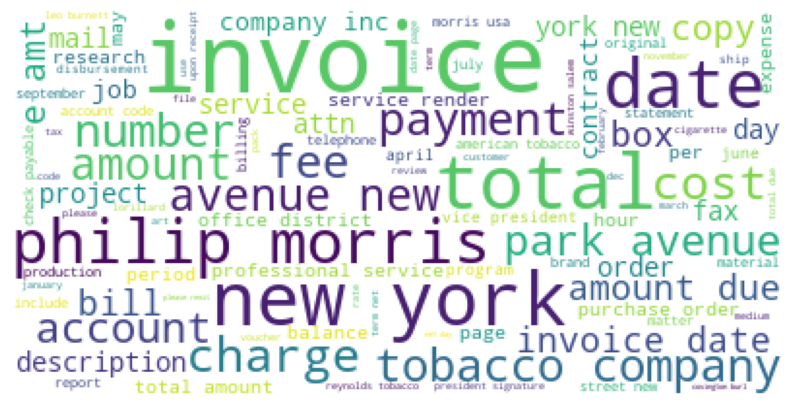

In [11]:
from src import create_wordcloud

create_wordcloud(lemmatized_tokens)

In [12]:
from collections import Counter

# Use Counter to get word frequencies
word_freq = Counter(lemmatized_tokens)

# Get the top 20 words
top_20_words = word_freq.most_common(20)

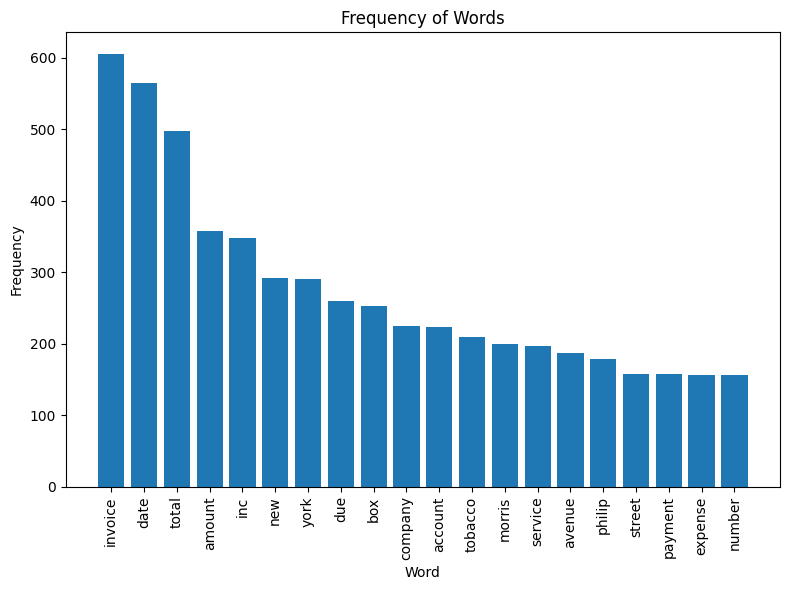

In [13]:
words, frequencies = zip(*top_20_words)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(words, frequencies)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequency of Words')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()